<a href="https://colab.research.google.com/github/Rakshithbodakuntla/Decision_tree_and_KNN/blob/main/Decision_tree_and_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Q7_decision_tree_iris.py
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris
iris = datasets.load_iris()
X = iris.data   # 4 features
y = iris.target

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

depths = [1, 2, 3]
results = {}

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    results[d] = (train_acc, test_acc)
    print(f"max_depth={d}: train_acc={train_acc:.4f}, test_acc={test_acc:.4f}")

# Expected behavior to look for:
# - Very low depth (1) likely underfits (low train and test accuracy)
# - Increasing depth improves training accuracy; if test accuracy falls after some depth, that indicates overfitting.


max_depth=1: train_acc=0.6667, test_acc=0.6667
max_depth=2: train_acc=0.9714, test_acc=0.8889
max_depth=3: train_acc=0.9810, test_acc=0.9778


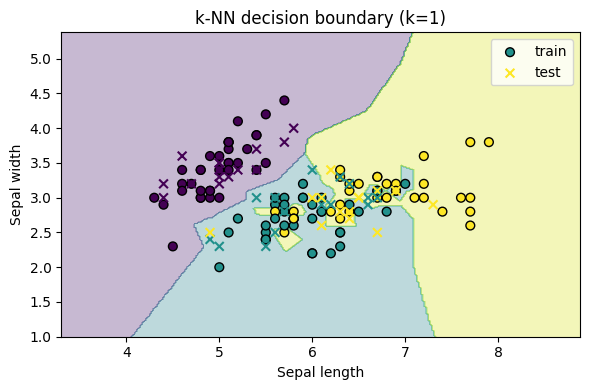

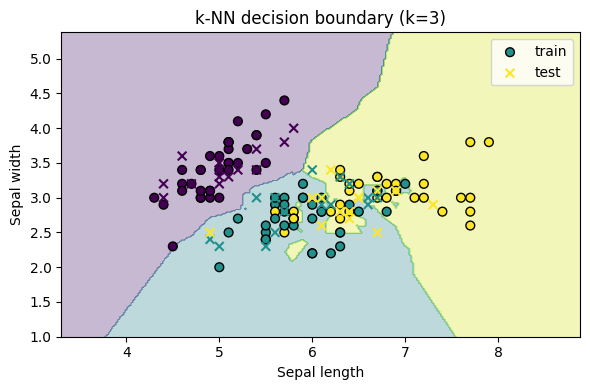

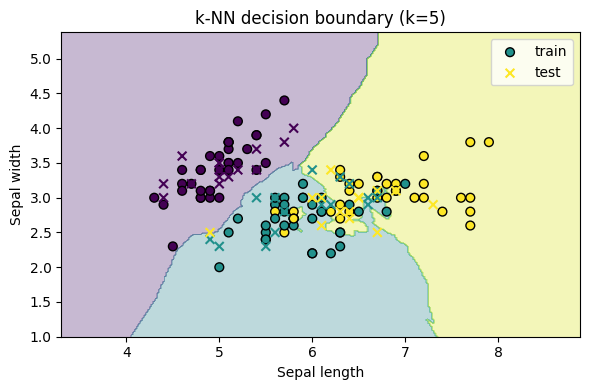

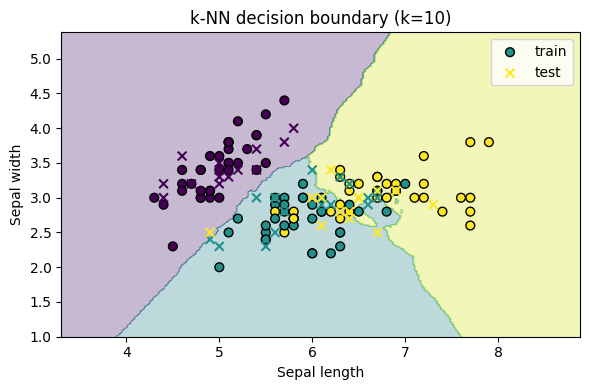

In [2]:
# Q8_knn_decision_boundaries.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Use only first two features: sepal length and sepal width
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

ks = [1, 3, 5, 10]
h = 0.02  # mesh step

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Create mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', label='train', s=40)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', s=40, label='test')
    plt.title(f'k-NN decision boundary (k={k})')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend()
    plt.tight_layout()

plt.show()


Confusion matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Per-class AUC: {0: np.float64(1.0), 1: np.float64(0.9955555555555555), 2: np.float64(0.9955555555555555)}
Macro AUC (mean of class AUCs): 0.997037037037037


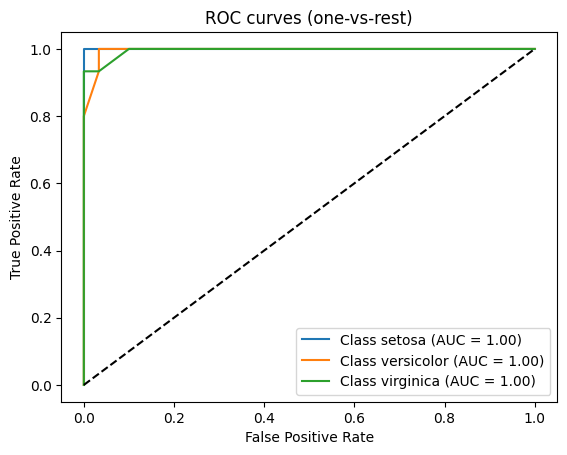

In [3]:
# Q9_knn_performance.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
classes = iris.target_names

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# kNN k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix & classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=classes))

# ROC and AUC (multiclass, One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn.predict_proba(X_test)  # shape (n_samples, n_classes)

# Compute ROC curve and AUC for each class
fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average AUC
# (for a simple summary we can average the per-class AUCs or compute macro)
roc_auc_macro = np.mean(list(roc_auc.values()))
print("Per-class AUC:", roc_auc)
print("Macro AUC (mean of class AUCs):", roc_auc_macro)

# Plot ROC for each class
plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves (one-vs-rest)')
plt.legend(loc='lower right')
plt.show()
